## Multiple Linear Regression and Regression Error Metrics

## Import library

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [17]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [18]:
df.shape

(200, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [22]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [23]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


## Distribution of features

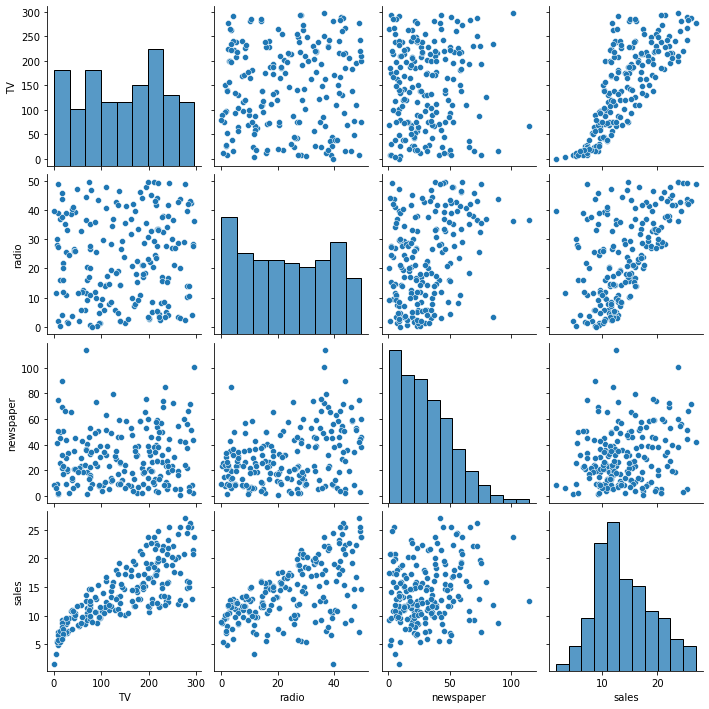

In [24]:
sns.pairplot(df);

In [25]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

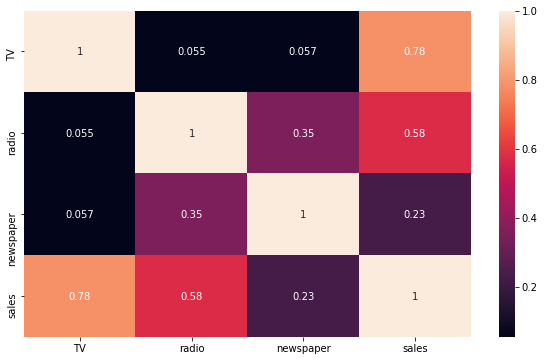

In [26]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [27]:
# pip install scikit-learn

In [28]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [31]:
df.sample(15)

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
89,109.8,47.8,51.4,16.7
177,170.2,7.8,35.2,11.7
70,199.1,30.6,38.7,18.3
161,85.7,35.8,49.3,13.3
41,177.0,33.4,38.7,17.1
108,13.1,0.4,25.6,5.3
125,87.2,11.8,25.9,10.6
30,292.9,28.3,43.2,21.4
187,191.1,28.7,18.2,17.3


In [32]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (140, 3)
Train target shape   :  (140,)
Test features shape  :  (60, 3)
Test target shape    :  (60,)


In [33]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [34]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [35]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [40]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [41]:
model.intercept_

2.7089490925159048

In [42]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [43]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.56539629743484

In [44]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [45]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [46]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


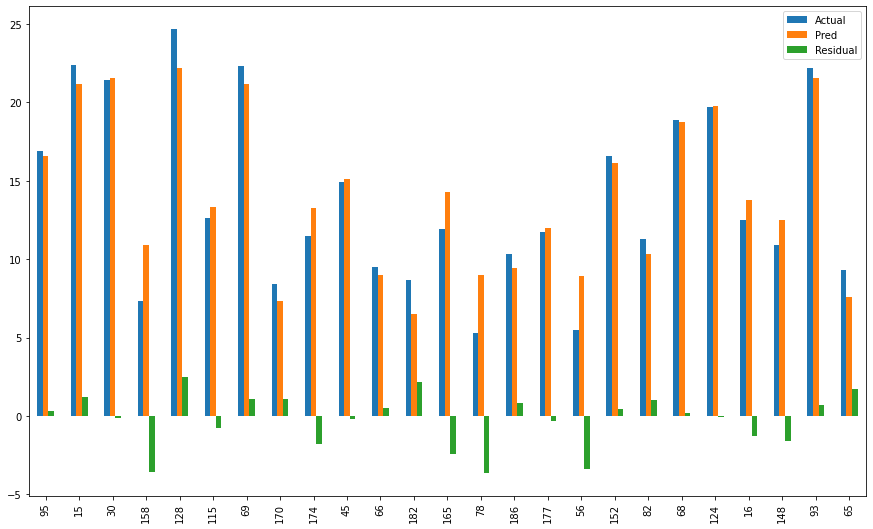

In [47]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230367

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.511669222454909

In [51]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7967972367152227

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446394

In [53]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [54]:
mae / sales_mean

0.10780311802138769

In [55]:
rmse / sales_mean

0.13895790367941802

## Adjusted R2 score 

In [56]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [57]:
adj_r2(y_test, y_pred, df)

0.8588182832335933

## What is the concept of punishment for RMSE error metric?

In [58]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}

In [59]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [60]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [61]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [62]:
#mae
df_2.residual.sum()/5 #200

200.0

In [63]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

209.76176963403032

## Evaluation Model

In [64]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [65]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230367
MAE 		: 1.511669222454909
MSE 		: 3.7967972367152227
RMSE 		: 1.9485372043446394


In [66]:
y_train_pred = model.predict(X_train)

In [67]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals (Data linear regression' a uygun mu değil mi?)

In [68]:
residuals = y_test-y_pred  # Gerçek değerden tahmin değer çıkarılır

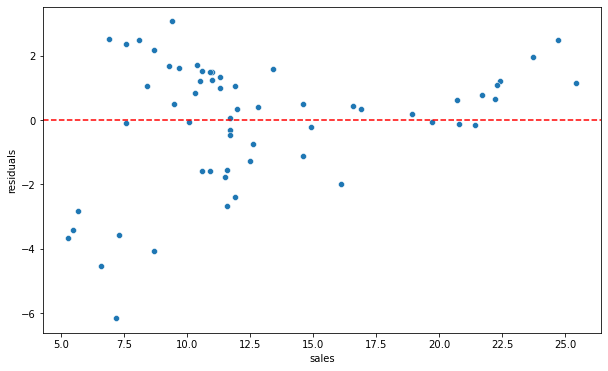

In [69]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y = 0, color ="r", linestyle = "--")   # Line için 
plt.ylabel("residuals")
plt.show()

Normal bir dağılım var mı yok mu diye grafiklere bakıyoruz.
Hem eşit dağılım olmalı hem de random dağılmalı (bir patern izlememeli.)

<AxesSubplot:xlabel='sales', ylabel='Density'>

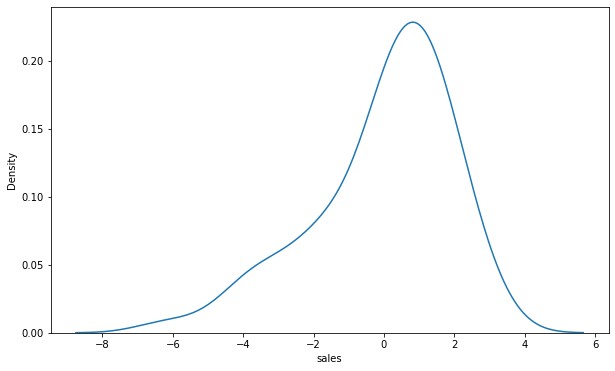

In [70]:
sns.kdeplot(residuals)

'probplot' bir datanın normal dağılıp dağılmadığına bakmak için sıklıkla kullanılır. Kırmızı çizgi, datanın normal dağılıma uyduğu mükemmel çizgi. Mavi çizgiler kırmızının etrafına bir sarmaşık gibi dolanırsa 'Data normal dağılıma uyar.'' deriz.  

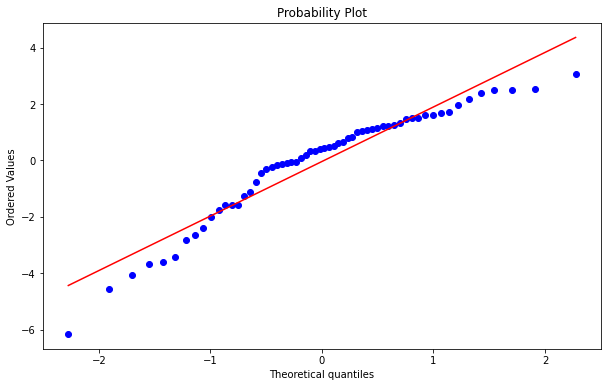

In [71]:
stats.probplot(residuals, dist ="norm", plot =plt); 

In [72]:
from scipy.stats import skew
skew(residuals)

-0.9865673346742728

'skew' değeri -0.5 ile +0.5 arasında normal dağılıma uyar. 1.0' den  sonraki değerler dağınıklığın başladığı kısım ki bizim datamız tam sınırda (0.98). Normal dağılıma uygun.)

In [73]:
#pip install yellowbrick (ML' de sıklıkla kullanılan görsel kütüphane)

In [103]:

!conda install -c districtdatalabs yellowbrick

^C


In [105]:
!pip install yellowbrick

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.20.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

In [107]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

ModuleNotFoundError: No module named 'yellowbrick'

## Prediction Error for LinearRegression 

In [75]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

ModuleNotFoundError: No module named 'yellowbrick'

Koyu renkle çizilen line, best fit line. Line' lar birbirine ne kadar yakınsa model o kadar başarılıdır.

## Retraining Model on Full Data

In [76]:
final_model = LinearRegression()

In [77]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [78]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [79]:
final_model.intercept_

2.9388893694594085

In [80]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [81]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [ ]:
coeff_df

## Prediction on New Data

Modeli iki boyutlu eğittiğimiz için prediction için verilen data da aynı boyutta olmalı:

In [82]:
adv = [[150, 20, 15]]

In [83]:
adv

[[150, 20, 15]]

In [84]:
final_model.predict(adv)

array([13.55862413])

In [85]:
final_model.coef_  # Feature' lardaki bir birimlik değişiklik targetta ne kadarlık değişime sebep oluyor'u buluyoruz.

array([ 0.04576465,  0.18853002, -0.00103749])

In [86]:
final_model.intercept_

2.9388893694594085

Yukardaki işlemleri aşağıda formülle hesaplarsak da aynı sonucu buluruz.

In [87]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  

13.558624130495994

In [88]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [89]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [90]:
14.01627059 - 13.55862413

0.4576464599999994

## The effect of features on the predicted label

In [91]:
coeff_df    #  Katsayılar

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [95]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [92]:
coeff_df.Coefficient * adv[0]

TV           6.864697
radio        3.770600
newspaper   -0.015562
Name: Coefficient, dtype: float64

In [93]:
6.864697 / 13.55862413

0.5062974630892729

In [94]:
3.770600 / 13.55862413

0.2780960637191142

In [ ]:
-0.015562 / 13.55862413